In [10]:
### Multi-class classification

In [11]:
import torch
from torch import nn   # pytroch building blocks for neural network
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make data
import sklearn
from sklearn.datasets import make_blobs

In [12]:
# Prepare blob data

X_blob, y_blob = make_blobs(n_samples=1000, # number of dots
                            n_features=2,  # number of dimensions for each dot (int this case 2 for x and y)
                            centers=6, # number of different colors (categories)
                            cluster_std=1.4,  # How dense is each category cluster (higher means less dense)
                            random_state=104)

In [13]:
# Display data as a dataframe

blobs = pd.DataFrame({"X1": X_blob[:,0], 
                        "X2": X_blob[:,1],
                        "Label":y_blob})
blobs.head()

,X1,X2,Label
0,-6.895625,4.479518,2
1,3.500021,-10.754912,5
2,0.432936,-9.578784,5
3,1.754576,-10.403692,5
4,-4.795823,2.411440,2


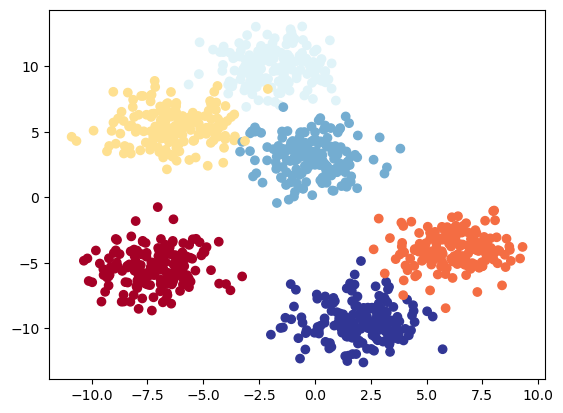

In [14]:
plt.scatter(x=X_blob[:, 0], y=X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [15]:
# Convert data to tensor

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

In [16]:
# Split data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X_blob, y_blob, test_size=0.25, random_state=314)

In [17]:
## Build a model for classification of circles

# This model is for non-linear data
class CircleClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Create nn.linear layer that can handle the data
        self.layer_1 = nn.Linear(in_features=2, out_features=40) # take in two values(point coorninates) and upscale it to 20
        self.layer_2 = nn.Linear(in_features=40, out_features=40) # process 20 upscaled values
        self.layer_3 = nn.Linear(in_features=40, out_features=40) # process 20 upscaled values
        self.layer_4 = nn.Linear(in_features=40, out_features=40) # process 20 upscaled values
        self.layer_5 = nn.Linear(in_features=40, out_features=40) # process 20 upscaled values
        self.out_layer = nn.Linear(in_features=40, out_features=6) # take the 20 processed values and output 6 answer (4 different colors of blobs)
        
        self.relu = nn.ReLU()# ReLu change all negative values to zero, and is a non-linear activation function

    def forward(self, X):
        X = X.float()
        return self.out_layer(self.relu(self.layer_5(self.relu(self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))))))))
    
# Random seed
torch.manual_seed(100)

model = CircleClassificationModel()

# Simpler way to set up basic model
'''
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=20),
    nn.Linear(in_features=20, out_features=20),
    nn.Linear(in_features=20, out_features=20),
    nn.Linear(in_features=20, out_features=1)
)
'''

model

CircleClassificationModel(
  (layer_1): Linear(in_features=2, out_features=40, bias=True)
  (layer_2): Linear(in_features=40, out_features=40, bias=True)
  (layer_3): Linear(in_features=40, out_features=40, bias=True)
  (layer_4): Linear(in_features=40, out_features=40, bias=True)
  (layer_5): Linear(in_features=40, out_features=40, bias=True)
  (out_layer): Linear(in_features=40, out_features=6, bias=True)
  (relu): ReLU()
)

In [19]:
# Create loss function and optimizer

# Loss function
loss_function = nn.CrossEntropyLoss()

# Create optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
